In [270]:
import numpy as np
import pandas as pd
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings; warnings.simplefilter('ignore')
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.decomposition import PCA
from numpy import linalg as LA
from tqdm import *
import math as math
import xgboost as xgb 
import sklearn.datasets as datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor


In [271]:
df = pd.read_excel('COMB_5DAY.xlsx')

In [272]:
#Discard rows and columns containing null values
df = df.dropna(how='any')

In [273]:
#sort by date
#df = df.sort_values(by='date')
#df = df.sort_values(by='DATE')

In [274]:
#choose_factor = [i for i in df.columns if i not in ['date','CLOSETOMORROW','ZSPREADTOMORROW']]
choose_factor = [i for i in df.columns if i not in ['DATE','ZSPREADTOMORROW']]

In [275]:
choose_feature = df[choose_factor]

In [276]:
choose_feature

,OPEN0,HIGH0,LOW0,CLOSE0,YTM0,ZSPREAD0,OPEN1,HIGH1,LOW1,CLOSE1,...,LOW3,CLOSE3,YTM3,ZSPREAD3,OPEN4,HIGH4,LOW4,CLOSE4,YTM4,ZSPREAD4
0,97.132,97.190,97.111,97.130,2.965,28.279,97.322,97.361,97.138,97.163,...,97.236,97.548,2.798,31.501,97.278,97.380,97.183,97.372,2.864,27.574
1,97.102,97.279,97.083,97.273,2.910,24.715,97.132,97.190,97.111,97.130,...,97.290,97.293,2.899,29.293,97.351,97.569,97.236,97.548,2.798,31.501
2,97.331,97.349,97.208,97.219,2.935,25.194,97.102,97.279,97.083,97.273,...,97.138,97.163,2.951,30.996,97.450,97.453,97.290,97.293,2.899,29.293
3,97.292,97.360,97.275,97.343,2.887,22.811,97.331,97.349,97.208,97.219,...,97.111,97.130,2.965,28.279,97.322,97.361,97.138,97.163,2.951,30.996
4,97.437,97.437,97.238,97.331,2.893,23.874,97.292,97.360,97.275,97.343,...,97.083,97.273,2.910,24.715,97.132,97.190,97.111,97.130,2.965,28.279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1875,102.021,102.039,102.019,102.031,0.378,5.226,102.089,102.089,102.027,102.029,...,102.094,102.125,0.324,-0.332,102.120,102.135,102.115,102.128,0.326,0.047
1876,102.031,102.033,102.024,102.033,0.372,6.008,102.021,102.039,102.019,102.031,...,102.075,102.089,0.349,2.383,102.115,102.133,102.094,102.125,0.324,-0.332
1877,102.012,102.012,101.909,101.952,0.436,13.183,102.031,102.033,102.024,102.033,...,102.027,102.029,0.396,6.091,102.115,102.118,102.075,102.089,0.349,2.383
1878,101.946,102.014,101.946,102.013,0.382,7.064,102.012,102.012,101.909,101.952,...,102.019,102.031,0.378,5.226,102.089,102.089,102.027,102.029,0.396,6.091


In [277]:
choose_label = df['ZSPREADTOMORROW']

In [278]:
#x_train = choose_feature.tail(200)
#y_train = choose_label.tail(200)

#x_test = choose_feature.head(80)
#y_test = choose_label.head(80)

x_train,x_test,y_train,y_test=train_test_split(choose_feature,choose_label,test_size=0.2,random_state=1)

In [279]:
## random forest
x_train

,OPEN0,HIGH0,LOW0,CLOSE0,YTM0,ZSPREAD0,OPEN1,HIGH1,LOW1,CLOSE1,...,LOW3,CLOSE3,YTM3,ZSPREAD3,OPEN4,HIGH4,LOW4,CLOSE4,YTM4,ZSPREAD4
547,100.799,100.799,100.670,100.682,0.468,0.854,100.751,100.815,100.751,100.805,...,100.690,100.690,0.489,4.315,100.721,100.758,100.697,100.752,0.376,-9.090
634,98.809,98.940,98.796,98.922,2.773,4.223,99.079,99.082,98.808,98.858,...,98.958,98.968,2.755,10.241,99.100,99.100,98.968,99.010,2.740,10.224
1591,103.662,103.664,103.560,103.617,0.527,20.901,103.543,103.665,103.450,103.660,...,103.354,103.357,0.646,32.043,103.468,103.477,103.370,103.388,0.635,32.031
799,101.140,101.167,101.082,101.133,1.911,16.623,101.171,101.210,101.002,101.029,...,101.276,101.291,1.847,18.034,101.485,101.502,101.266,101.269,1.857,17.834
40,97.926,98.022,97.906,98.010,2.670,10.097,97.799,97.911,97.799,97.901,...,97.749,97.815,2.747,13.841,97.772,97.842,97.772,97.811,2.747,11.971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,101.591,101.710,101.591,101.667,1.529,5.769,101.621,101.645,101.526,101.526,...,101.589,101.594,1.572,6.892,101.619,101.619,101.558,101.590,1.576,6.618
1791,102.614,102.638,102.610,102.618,0.362,6.605,102.680,102.680,102.626,102.626,...,102.668,102.668,0.344,5.526,102.692,102.759,102.681,102.759,0.289,-1.560
1096,102.424,102.468,102.424,102.451,0.347,-3.745,102.461,102.461,102.421,102.424,...,102.476,102.476,0.349,-4.261,102.510,102.513,102.491,102.491,0.342,-3.922
235,100.010,100.010,99.971,99.985,1.858,16.205,99.950,100.047,99.948,100.033,...,99.911,99.961,1.872,21.322,99.989,99.991,99.892,99.900,1.907,22.594


In [280]:
# from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [281]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Train a random forest to solve regression problems
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=200)
forest.fit(x_train, y_train)
y_pred = forest.predict(x_test)

# Evaluate regression performance
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R^2 Score of random forest model：\n",r2_score(y_test,y_pred))

Mean Absolute Error: 4.4226410505319125
Mean Squared Error: 103.68338483212791
Root Mean Squared Error: 10.182503858684656
R^2 Score of random forest model：
 0.8649017976661658


In [282]:
importances = forest.feature_importances_ 
importances_df = pd.DataFrame([choose_factor, importances], index=['Features', 'Importances']).T
importances_df.sort_values(by='Importances',ascending=False).head(10)

,Features,Importances
5,ZSPREAD0,0.842838
11,ZSPREAD1,0.0275361
4,YTM0,0.0207777
3,CLOSE0,0.0169469
10,YTM1,0.0134262
23,ZSPREAD3,0.00886664
29,ZSPREAD4,0.00768137
17,ZSPREAD2,0.00695101
2,LOW0,0.00675887
28,YTM4,0.00512625


In [283]:
plots = pd.DataFrame(y_pred,y_test).reset_index()
plots=plots.head(130)

In [284]:
plots.columns = ['true','predict']

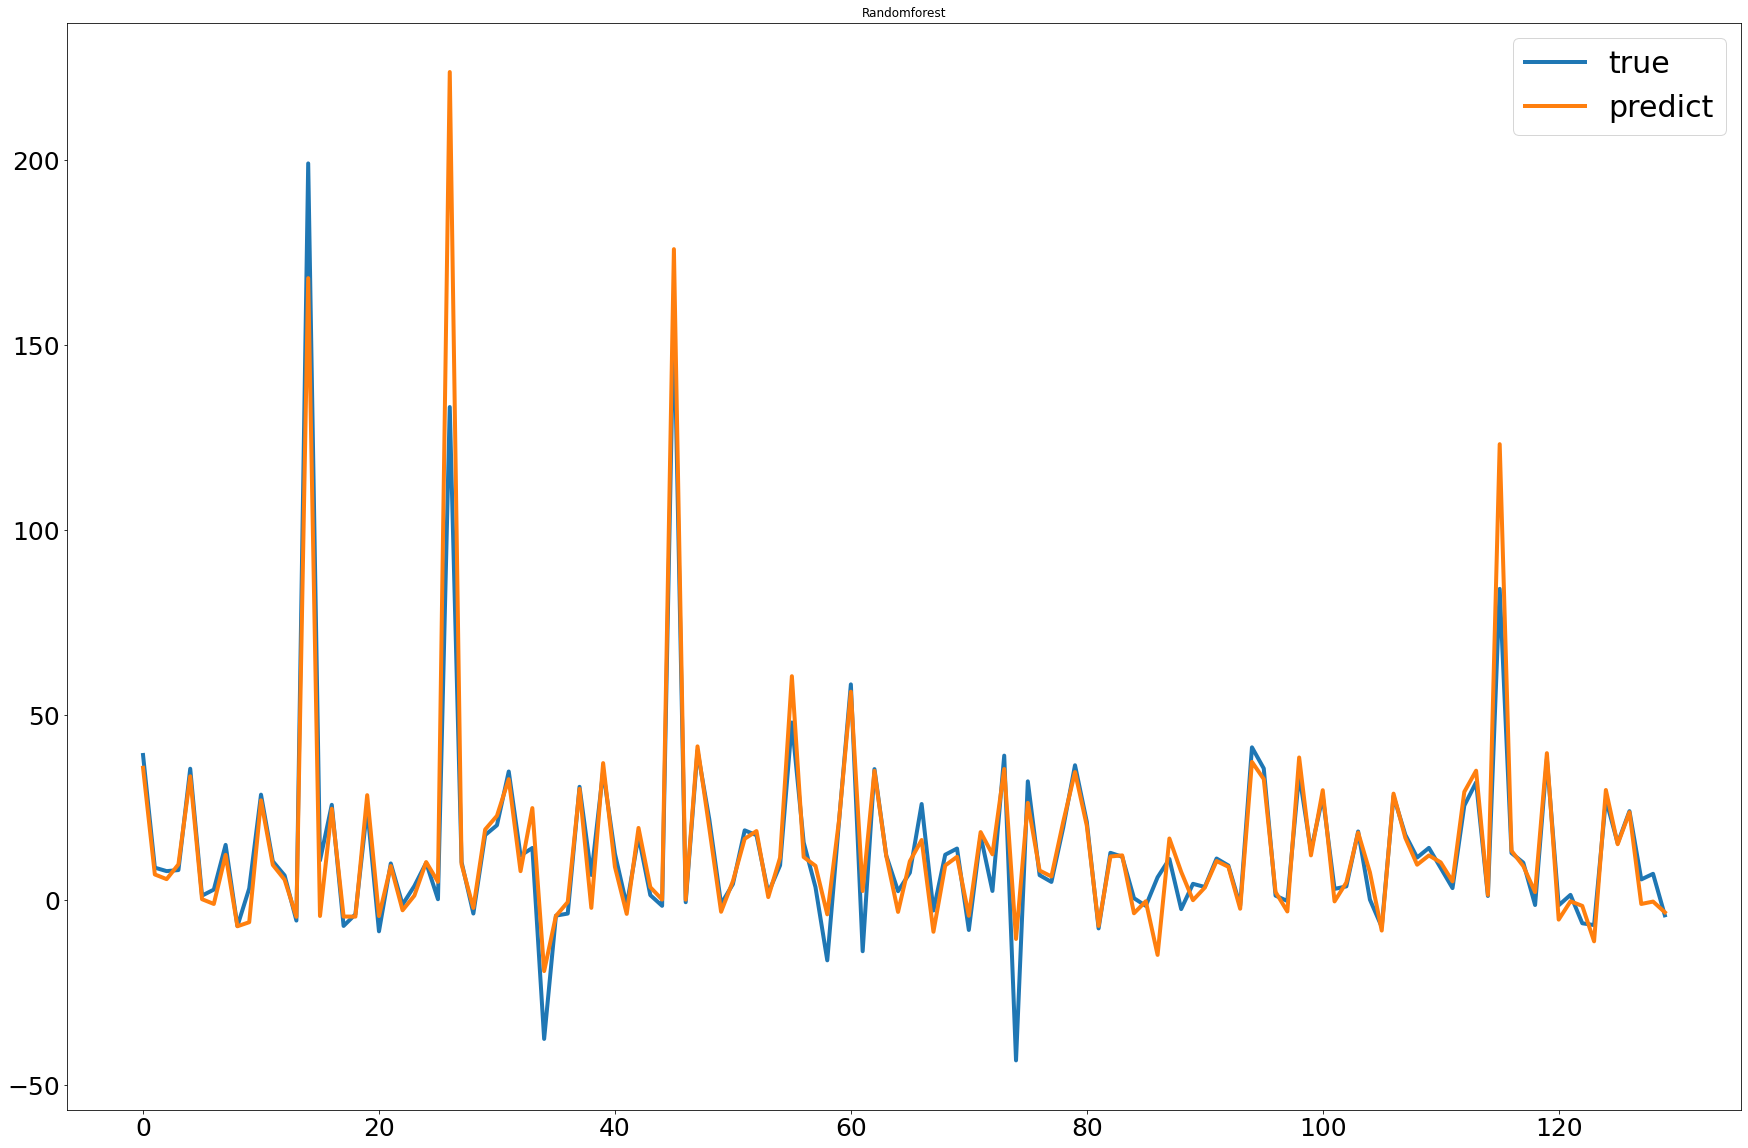

In [285]:
plots.plot(figsize=(30,20),title='Randomforest',fontsize=25,linewidth = '4')
plt.legend(fontsize=30)

In [286]:
## LinearRegression

In [287]:
from sklearn.linear_model import LinearRegression  # 线性回归
linearmodel = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
linearmodel.fit(x_train,y_train)   # 线性回归建模
predicted = linearmodel.predict(x_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print("R^2 Score of linear model：\n",r2_score(y_test,predicted))

Mean Absolute Error: 4.621606945950021
Mean Squared Error: 83.15347344158631
Root Mean Squared Error: 9.118852638440119
R^2 Score of linear model：
 0.8916520250765237


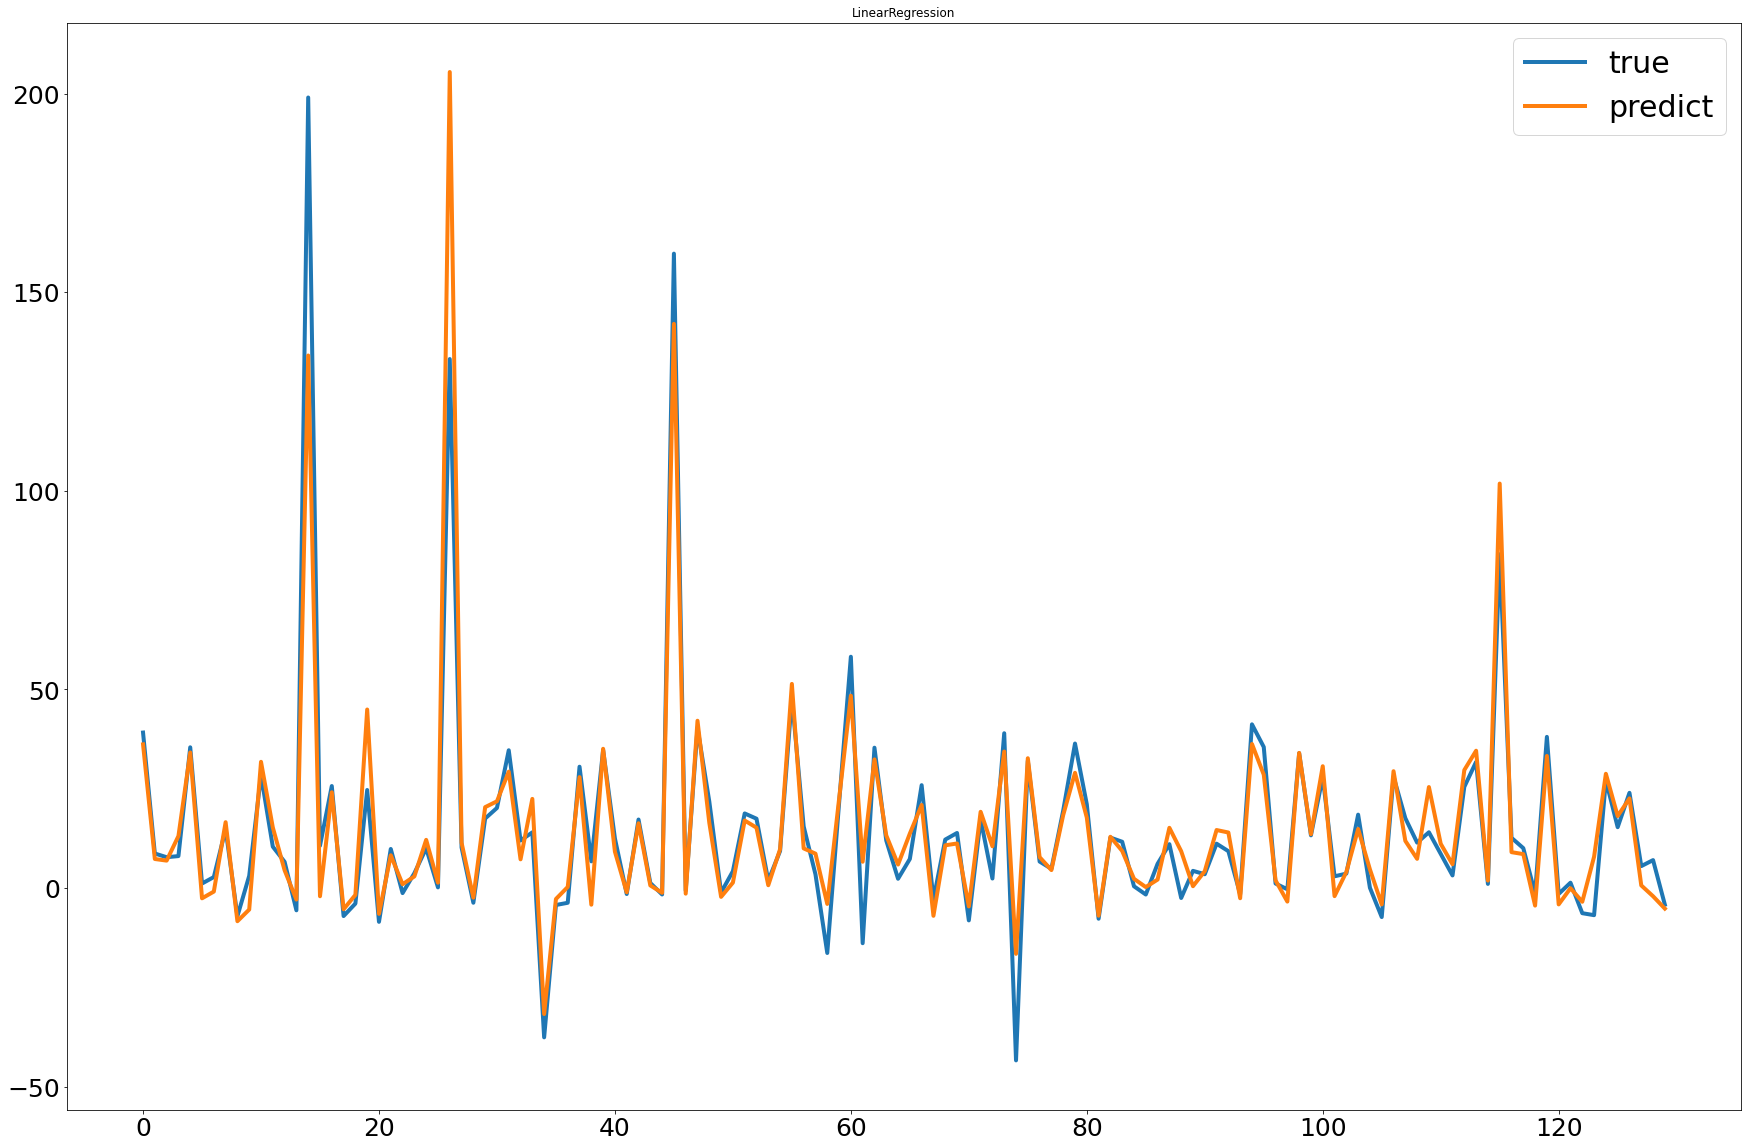

In [288]:
plots = pd.DataFrame(predicted,y_test).reset_index()
plots=plots.head(130)
plots.columns = ['true','predict']
plots.plot(figsize=(30,20),title='LinearRegression',fontsize=25,linewidth = '4')
plt.legend(fontsize=30)

In [289]:
##ridge model

In [290]:
from sklearn.linear_model import Ridge
ridgemodel = Ridge(alpha=10)
ridgemodel.fit(x_train,y_train)  
ridge_pred = ridgemodel.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ridge_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ridge_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))
print("R^2 Score of ridge model：\n",r2_score(y_test,ridge_pred))

Mean Absolute Error: 4.12559424471897
Mean Squared Error: 78.07438427604463
Root Mean Squared Error: 8.835971043187309
R^2 Score of ridge model：
 0.8982700171190184


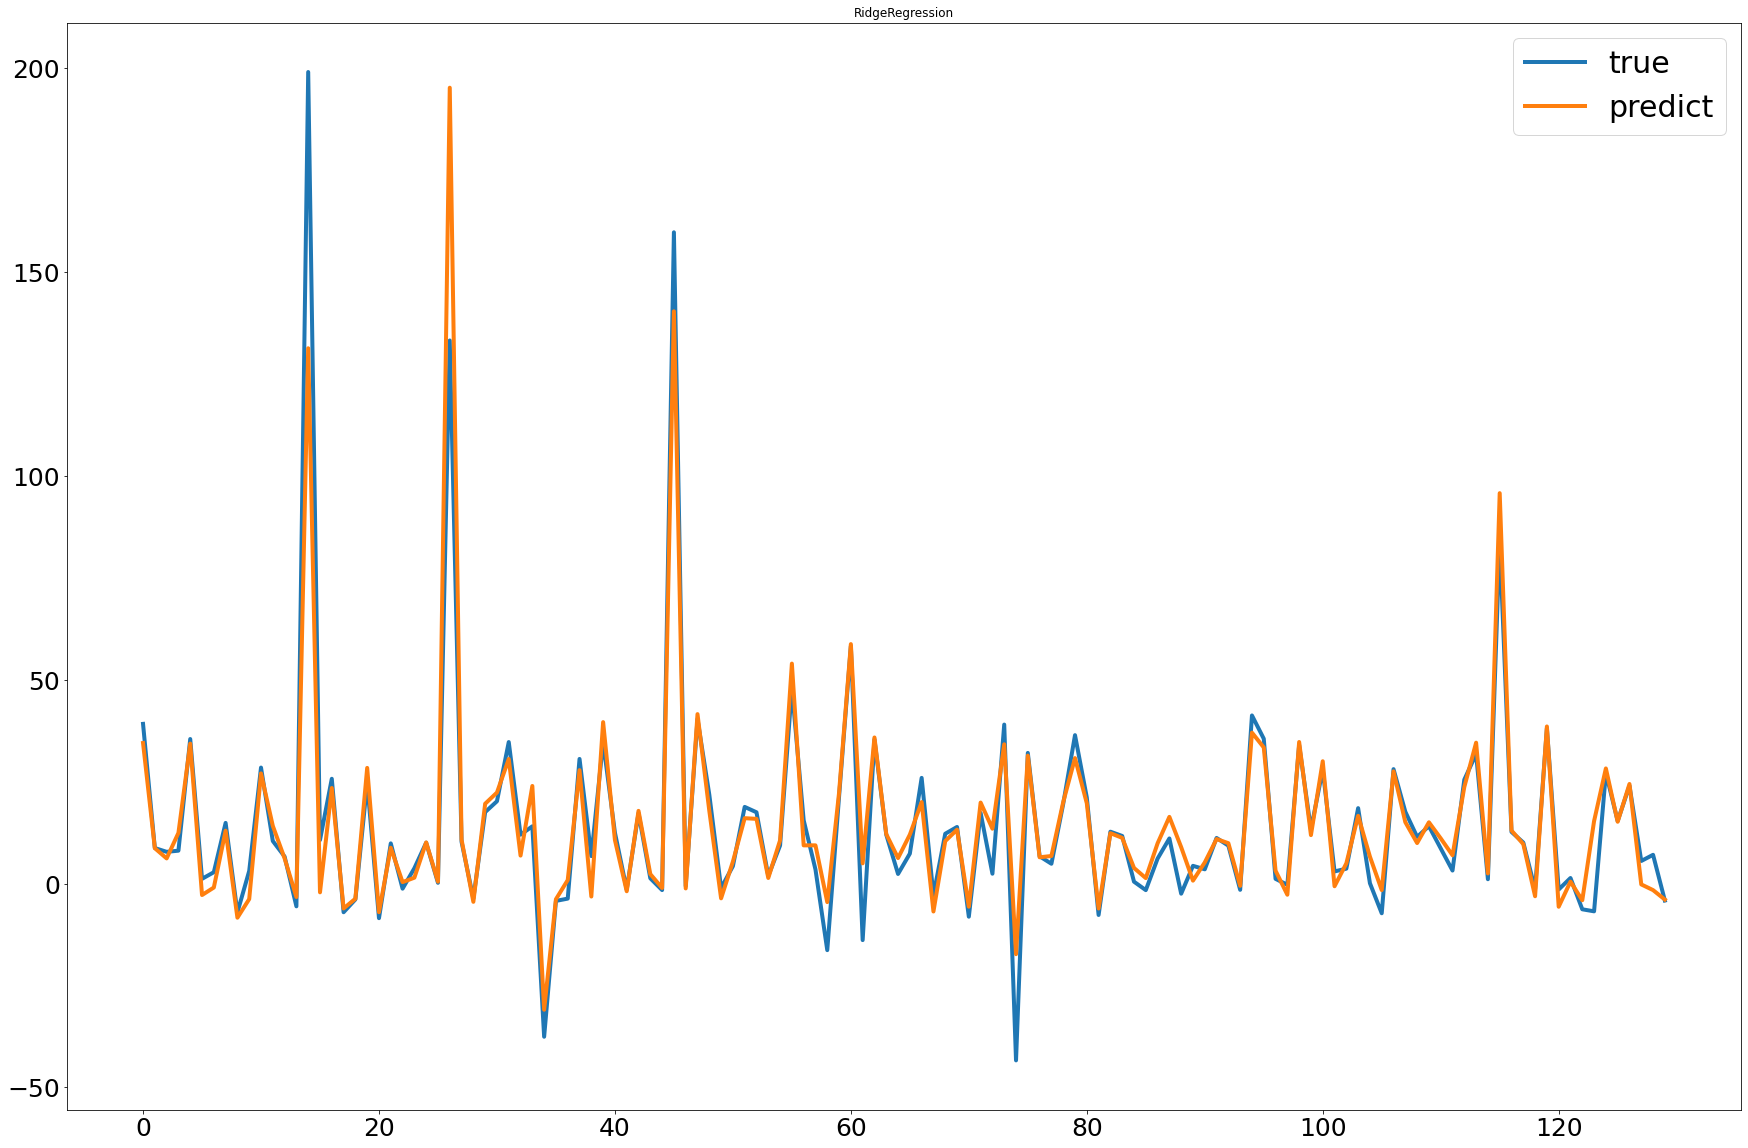

In [291]:
plots = pd.DataFrame(ridge_pred,y_test).reset_index()
plots=plots.head(130)
plots.columns = ['true','predict']
plots.plot(figsize=(30,20),title='RidgeRegression',fontsize=25,linewidth = '4')
plt.legend(fontsize=30)

In [292]:
#KNN

In [293]:
from sklearn import neighbors
KNN_model = neighbors.KNeighborsRegressor()
KNN_model.fit(x_train,y_train)
KNN_pred = KNN_model.predict(x_test)

print('Mean Absolute Error of KNN_model:', metrics.mean_absolute_error(y_test, KNN_pred))
print('Mean Squared Error of KNN_model:', metrics.mean_squared_error(y_test, KNN_pred))
print('Root Mean Squared Error of KNN_model:',np.sqrt(metrics.mean_squared_error(y_test, KNN_pred)))
print("R^2 Score of KNN model：",r2_score(y_test,KNN_pred))

Mean Absolute Error of KNN_model: 4.358728191489362
Mean Squared Error of KNN_model: 81.26322837117021
Root Mean Squared Error of KNN_model: 9.014611936804059
R^2 Score of KNN model： 0.8941149916492014


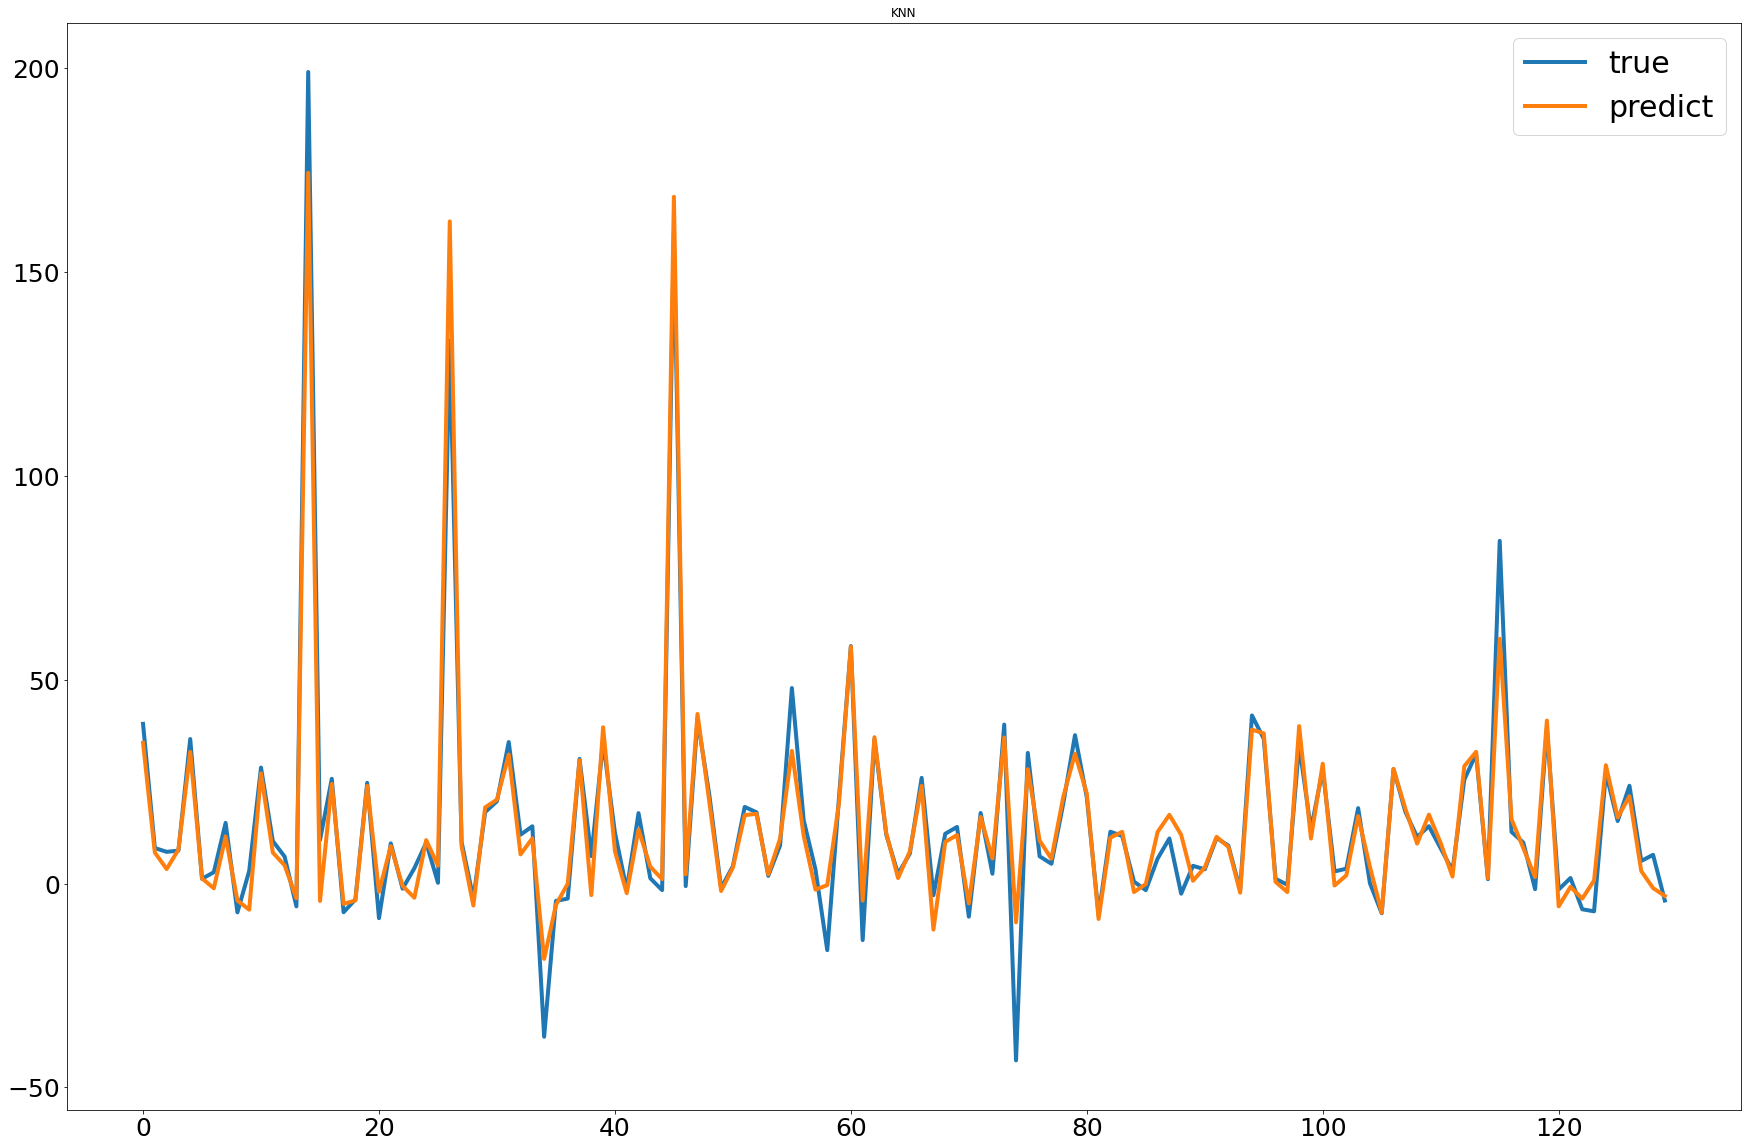

In [294]:
plots = pd.DataFrame(KNN_pred,y_test).reset_index()
plots=plots.head(130)
plots.columns = ['true','predict']
plots.plot(figsize=(30,20),title='KNN',fontsize=25,linewidth = '4')
plt.legend(fontsize=30)

In [295]:
#SVM

In [296]:
from sklearn.svm import SVR
#线性核函数 Linear kernel function
lin_svr = SVR(kernel='linear')
lin_svr.fit(x_train,y_train)
lin_svr_pred=lin_svr.predict(x_test)
print('Mean Absolute Error of lin_svr:', metrics.mean_absolute_error(y_test, lin_svr_pred))
print('Mean Squared Error of lin_svr:', metrics.mean_squared_error(y_test, lin_svr_pred))
print('Root Mean Squared Error of lin_svr:',np.sqrt(metrics.mean_squared_error(y_test, lin_svr_pred)))
print("R^2 Score of lin_svr：\n",r2_score(y_test,lin_svr_pred))

#多项式核函数 Polynomial kernel function
poly_svr = SVR(kernel='poly')
poly_svr.fit(x_train,y_train)
poly_svr_pred=poly_svr.predict(x_test)
print('Mean Absolute Error of poly_svr:', metrics.mean_absolute_error(y_test, poly_svr_pred))
print('Mean Squared Error of poly_svr:', metrics.mean_squared_error(y_test, poly_svr_pred))
print('Root Mean Squared Error of poly_svr:',np.sqrt(metrics.mean_squared_error(y_test, poly_svr_pred)))
print("R^2 Score of poly_svr：\n",r2_score(y_test,poly_svr_pred))

#径向基核函数
rbf_svr = SVR(kernel='rbf')
rbf_svr.fit(x_train,y_train)
rbf_svr_pred=rbf_svr.predict(x_test)
print('Mean Absolute Error of rbf_svr:', metrics.mean_absolute_error(y_test, rbf_svr_pred))
print('Mean Squared Error of rbf_svr:', metrics.mean_squared_error(y_test, rbf_svr_pred))
print('Root Mean Squared Error of rbf_svr:',np.sqrt(metrics.mean_squared_error(y_test, rbf_svr_pred)))
print("R^2 Score of rbf_svr：\n",r2_score(y_test,rbf_svr_pred))

Mean Absolute Error of lin_svr: 3.9563955958870087
Mean Squared Error of lin_svr: 76.9318840555874
Root Mean Squared Error of lin_svr: 8.771082262502581
R^2 Score of lin_svr：
 0.899758681153277
Mean Absolute Error of poly_svr: 12.143879613557012
Mean Squared Error of poly_svr: 1441.284822667921
Root Mean Squared Error of poly_svr: 37.964257172608036
R^2 Score of poly_svr：
 -0.8779767742800357
Mean Absolute Error of rbf_svr: 7.340229394709868
Mean Squared Error of rbf_svr: 488.777646137915
Root Mean Squared Error of rbf_svr: 22.108316221230304
R^2 Score of rbf_svr：
 0.3631286108077183


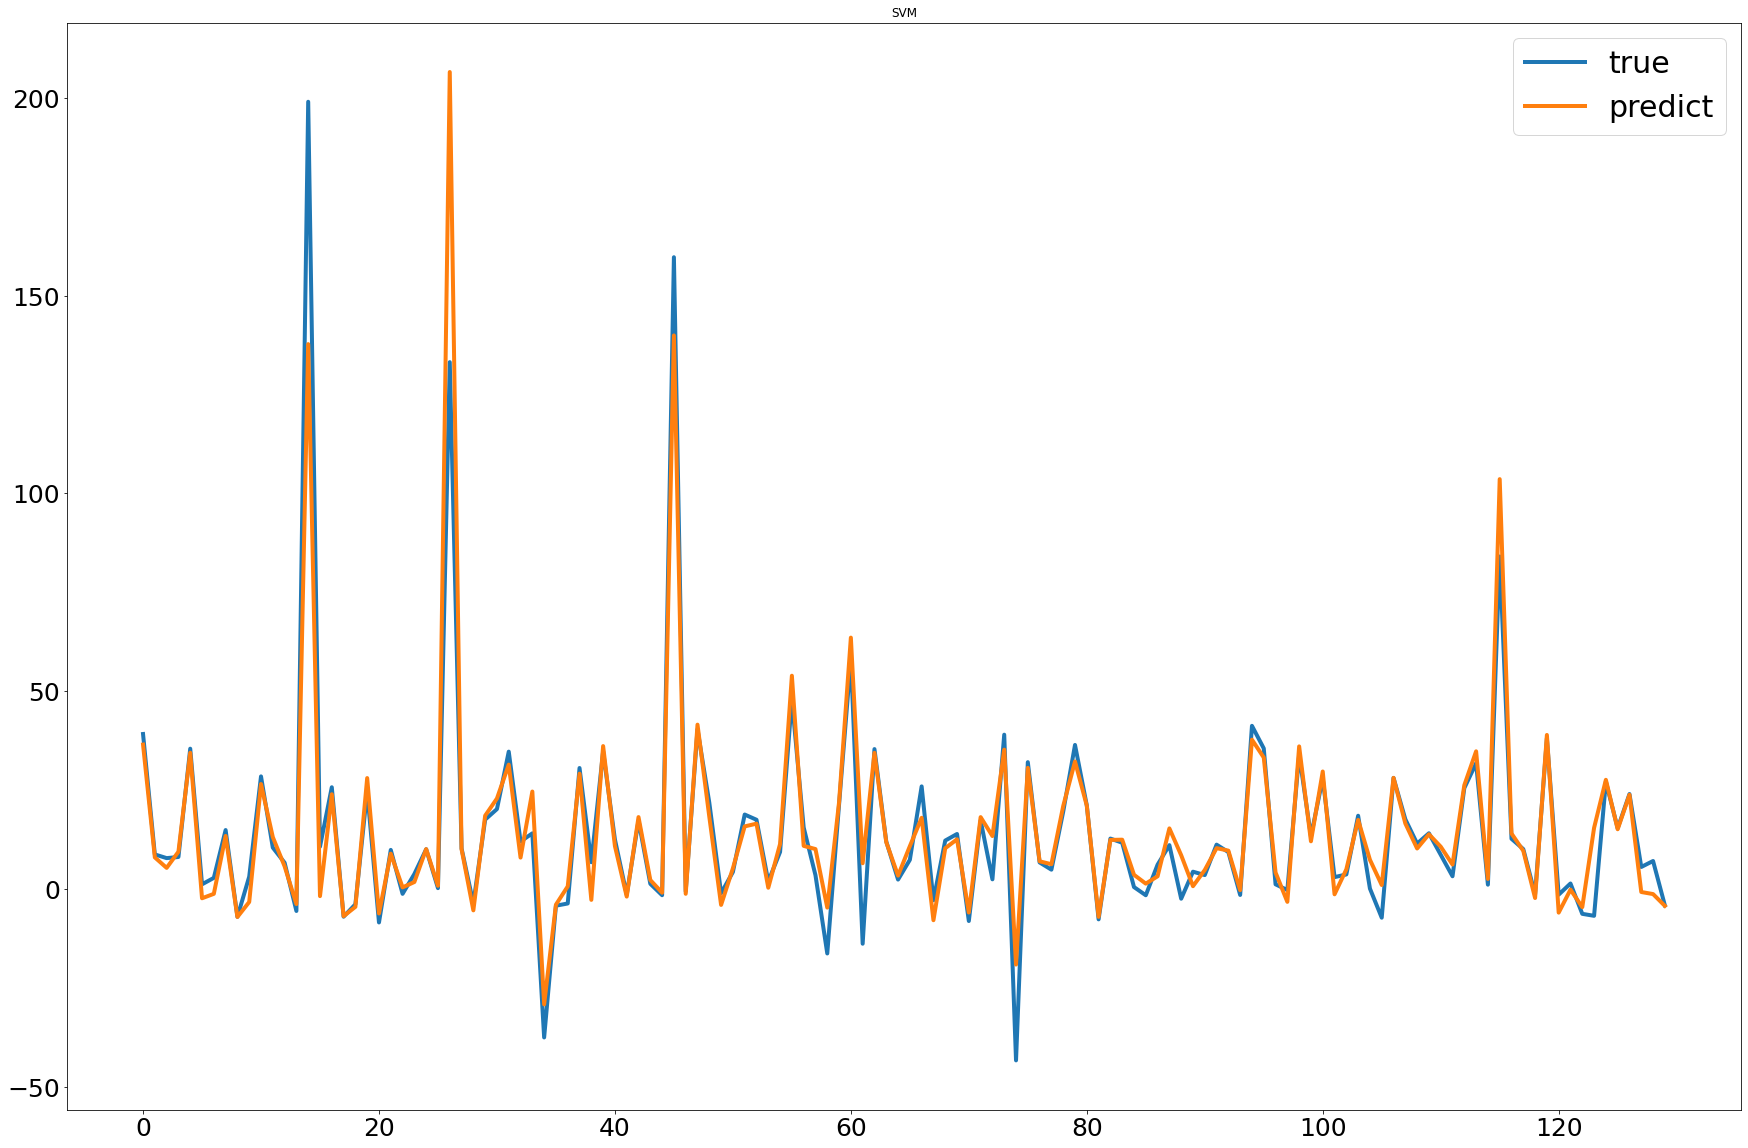

In [297]:
plots = pd.DataFrame(lin_svr_pred,y_test).reset_index()
plots=plots.head(130)
plots.columns = ['true','predict']
plots.plot(figsize=(30,20),title='SVM',fontsize=25,linewidth = '4')
plt.legend(fontsize=30)

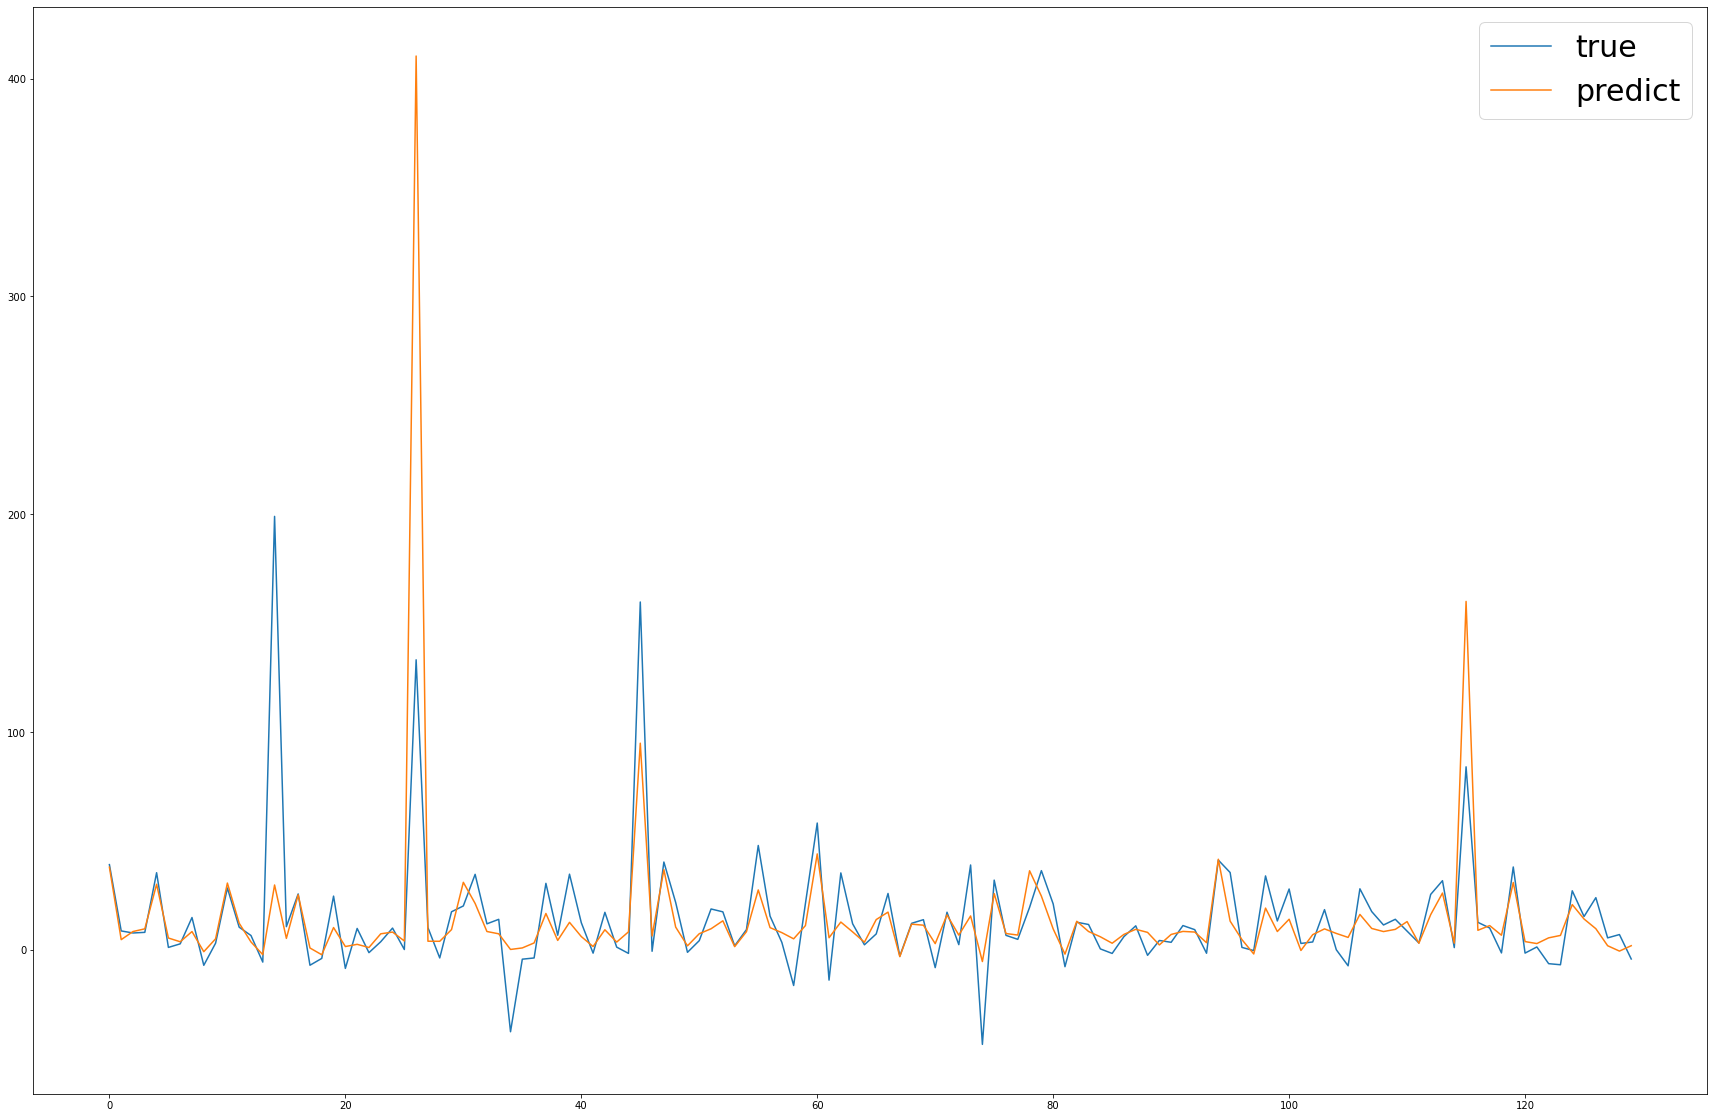

In [298]:
plots = pd.DataFrame(poly_svr_pred,y_test).reset_index()
plots=plots.head(130)
plots.columns = ['true','predict']
plots.plot(figsize=(30,20))
plt.legend(fontsize=30)

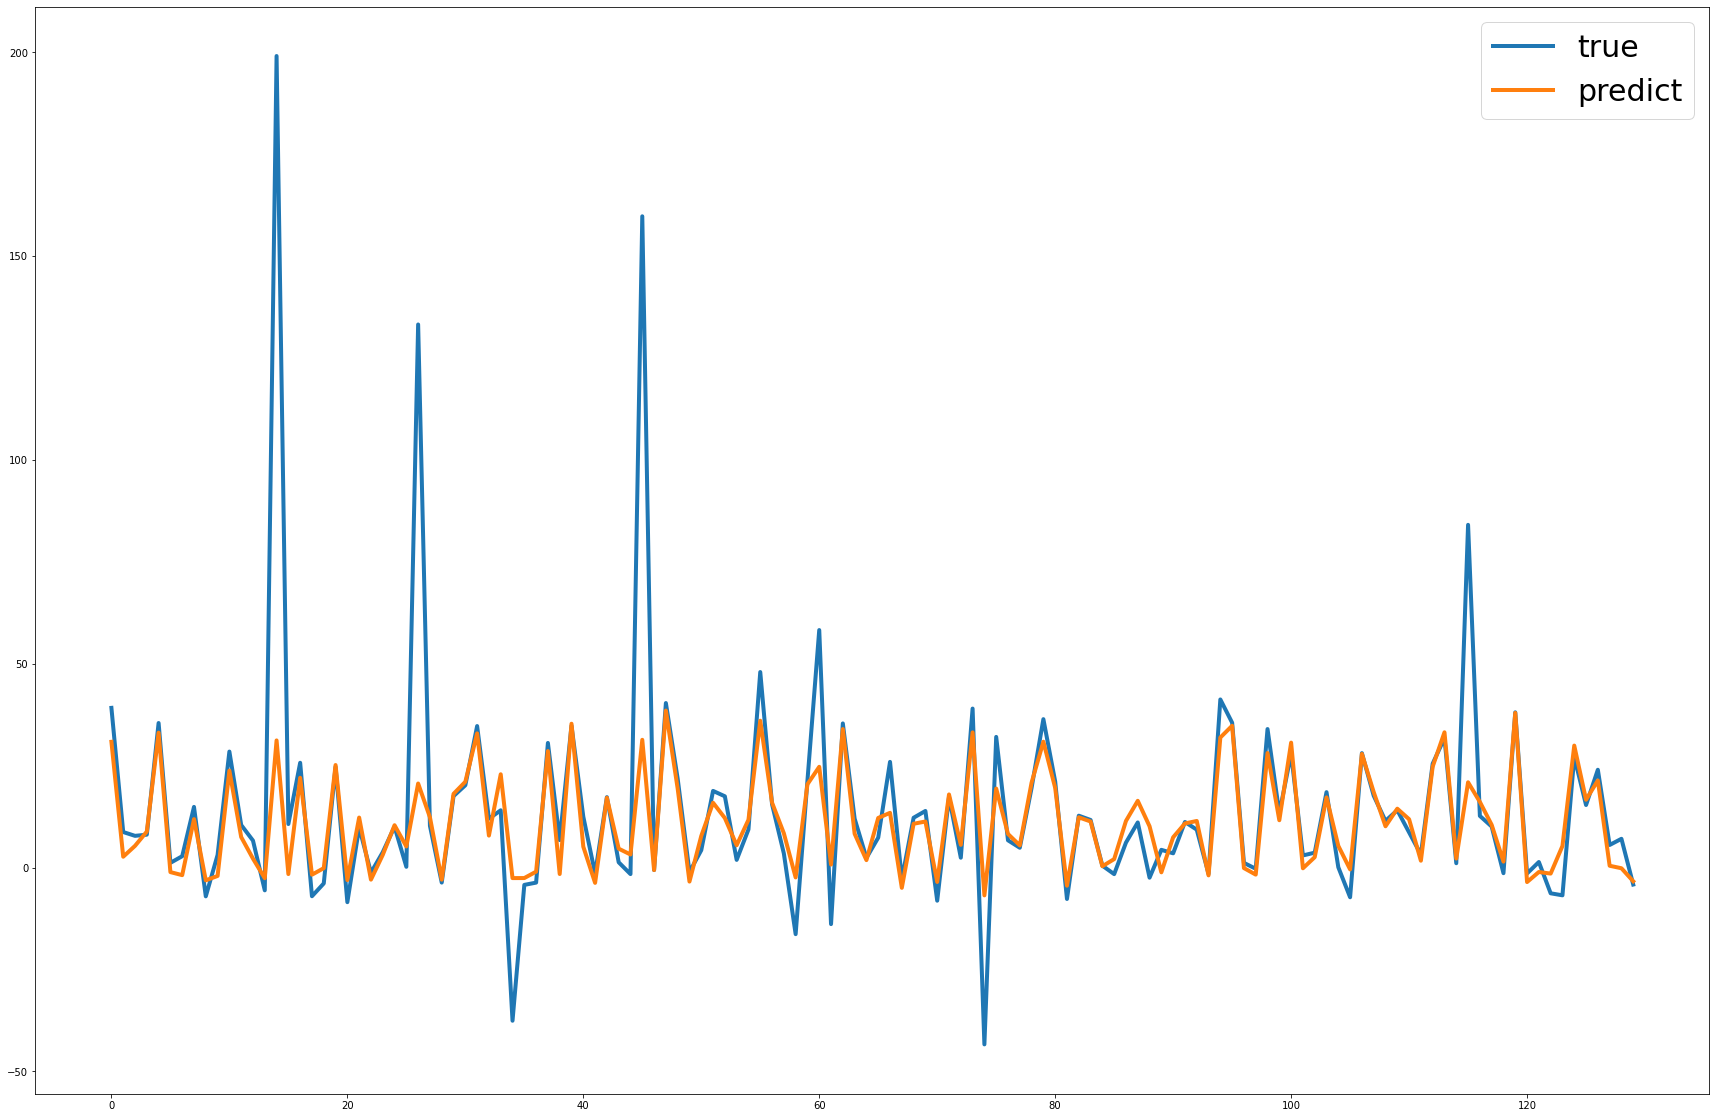

In [299]:
plots = pd.DataFrame(rbf_svr_pred,y_test).reset_index()
plots=plots.head(130)
plots.columns = ['true','predict']
plots.plot(figsize=(30,20),linewidth = '4')
plt.legend(fontsize=30)

In [300]:
#ANN

In [301]:
from sklearn.neural_network import MLPClassifier
ANN=MLPClassifier()
ANN.fit(x_train,y_train.astype('int'))
ANN_pred=ANN.predict(x_test)

print('Mean Absolute Error of ANN_model:', metrics.mean_absolute_error(y_test, ANN_pred))
print('Mean Squared Error of ANN_model:', metrics.mean_squared_error(y_test, ANN_pred))
print('Root Mean Squared Error of ANN_model:',np.sqrt(metrics.mean_squared_error(y_test, ANN_pred)))
print("R^2 Score of ANN model：",r2_score(y_test,ANN_pred))

Mean Absolute Error of ANN_model: 5.77605585106383
Mean Squared Error of ANN_model: 156.15388230053193
Root Mean Squared Error of ANN_model: 12.496154700568168
R^2 Score of ANN model： 0.7965333710853735


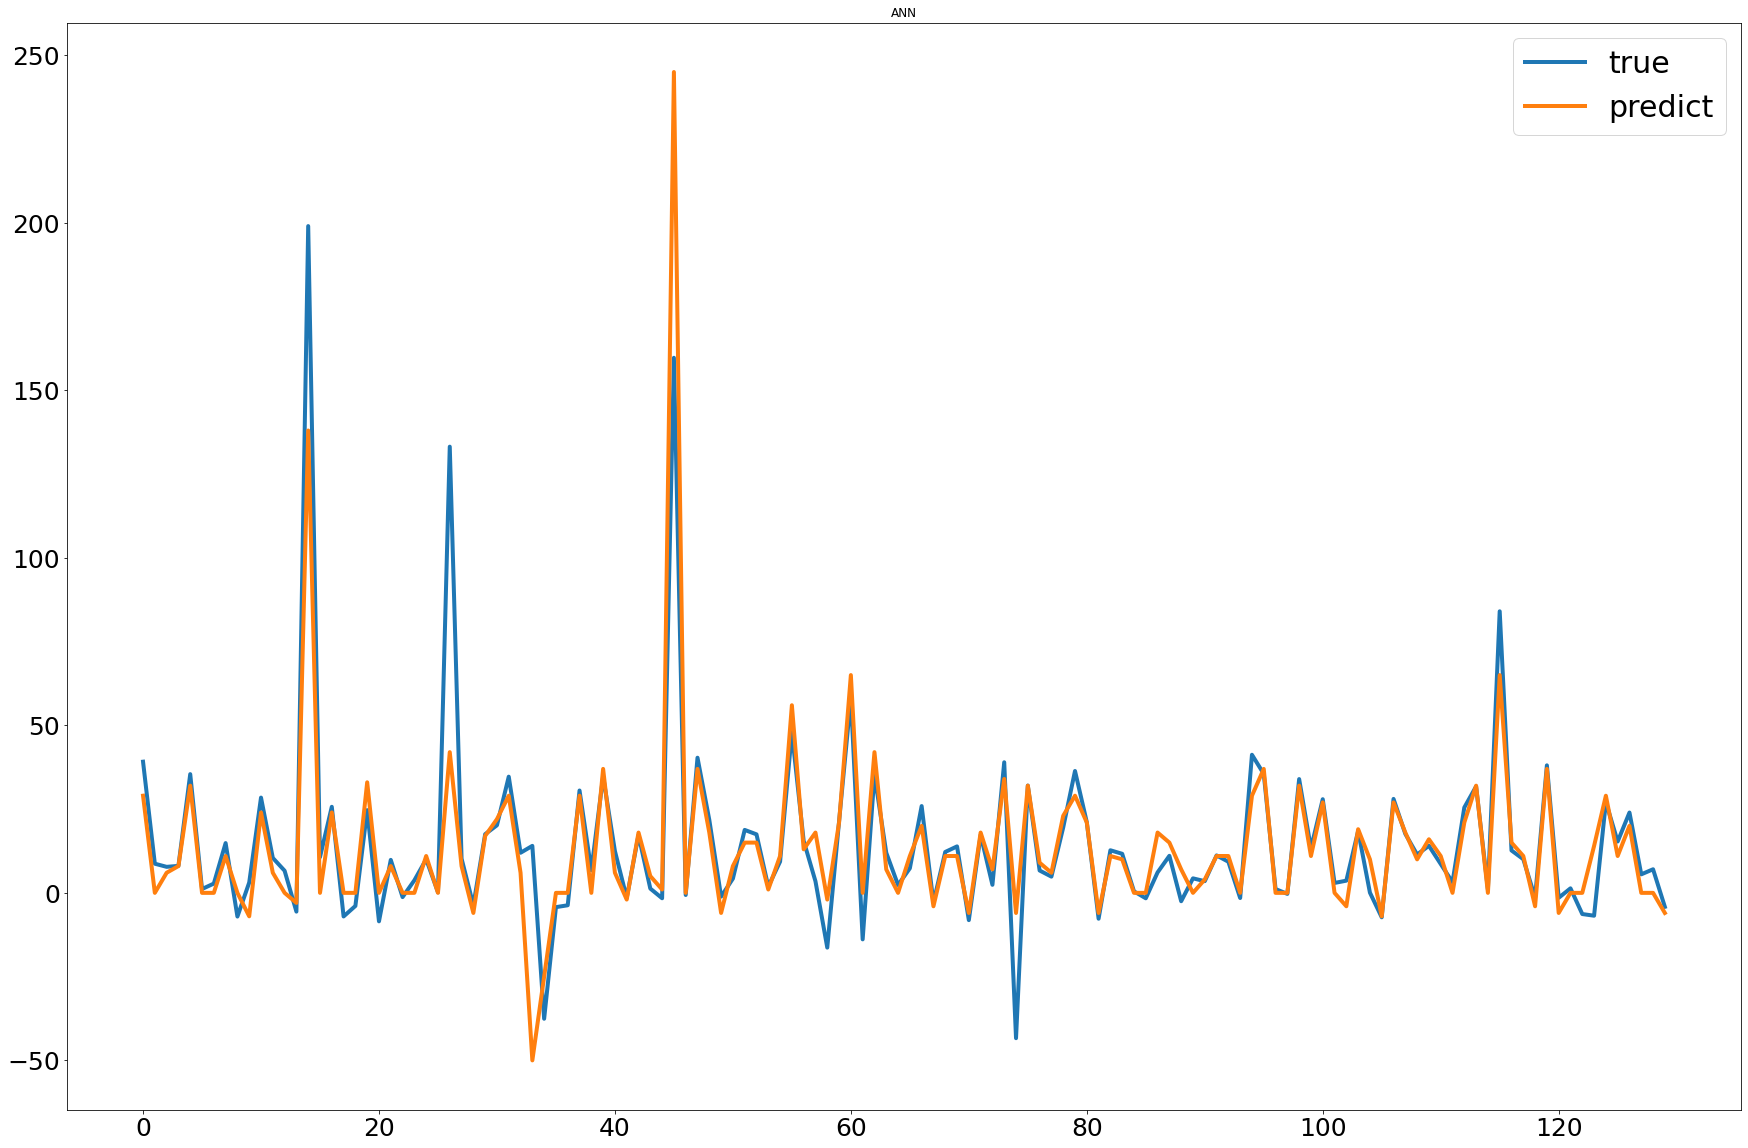

In [302]:
plots = pd.DataFrame(ANN_pred,y_test).reset_index()
plots=plots.head(130)
plots.columns = ['true','predict']
plots.plot(figsize=(30,20),title='ANN',fontsize=25,linewidth = '4')
plt.legend(fontsize=30)

In [303]:
#ARIMA

In [304]:
#from statsmodels.tsa.arima.model import ARIMA
#ARIMA_MODEL = ARIMA(df,order=(5,1,0))
#ARIMA_MODEL = ARIMA_MODEL.fit(x_train,y_train)